# Part 1

In [1]:
# module to make available data structures and routines
# for numerics
import numpy as np 

# modules necessary for plotting
import matplotlib.pyplot as plt

#module to make best-fit parameters using a least square fit 
from scipy.optimize import curve_fit



def Hill_function(x, LogEC50, Hillslope):
    
    y = Bottom + (Top - Bottom)/(1 + 10**(LogEC50-x) * Hillslope)
    return y




In [2]:
xdata = [-7.0,-6.5,-6.0,-5.5,-5.0,-4.5,-4.0,-3.5,-3.0]
ydata = [4.0,4.0,14.0,14.0,24.0,24.0,25.0,31.0,29.0]
bottom = [1.0,5.0,14.0,19.0,23.0,26.0,26.0,27.0,27.0]
top = [5.0,8.0,12.0,22.0,21.0,24.0,24.0,26.0,25.0]

xdata = np.array(xdata)
ydata = np.array(ydata)
Bottom = np.array(bottom)
Top = np.array(top)

LogEC50 = 100.
Hillslope = 100.



In [3]:
parameter_Hill_function,covariance_Hill_function = curve_fit(Hill_function, xdata, ydata)

C:\Users\MY PC\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [4]:
fitted_data = Hill_function(xdata, *parameter_Hill_function)

# Plotting the data and fit without error

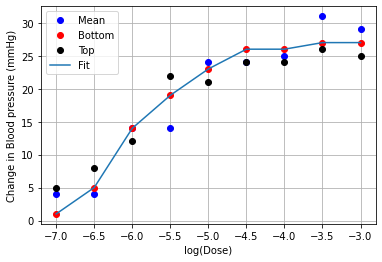

In [5]:
plt.plot(xdata, ydata, 'o', color='blue', label='Mean')
plt.plot(xdata, Bottom, 'o', color='red', label='Bottom')
plt.plot(xdata, Top, 'o', color='black', label='Top')
plt.plot(xdata, fitted_data, label='Fit')
plt.ylabel("Change in Blood pressure (mmHg)")
plt.xlabel("log(Dose)")
plt.legend()
plt.grid()
#plt.show()
plt.savefig("fit_data_without_error.pdf", dpi=400, bbox_inches='tight')

### When we have no uncertainity 

In [6]:
ymeans = ydata
y_lin = Hill_function(xdata, *parameter_Hill_function)  
dof = len(ymeans) - len(parameter_Hill_function) 
chi_square_value = sum((ymeans - y_lin)**2/y_lin)
red_chi_square_value = (chi_square_value/dof) 
print("chi square value;",chi_square_value)
print("reduced chi square value;",red_chi_square_value) 

chi square value; 11.492316167602208
reduced chi square value; 1.641759452514601


# Part 2

# Convert the assymetric error to symmetric error and then run the linear and quadratic fit with error

In [7]:
# Calculate here

In [8]:
# module to make available data structures and routines
# for numerics
import numpy as np 

# modules necessary for plotting
import matplotlib.pyplot as plt

#module to make best-fit parameters using a least square fit 
from scipy.optimize import curve_fit



def linear(x, slope, intercept):
    
    y = slope*x + intercept
    return y


def quadratic(x, a, b, c):
    
    y = a*x**2 + b*x + c
    return y


def cubic(x, a, b, c, d):
    
    y = a*x**3 + b*x**2 + c*x + d
    return y


In [9]:
xdata = [-7.0,-6.5,-6.0,-5.5,-5.0,-4.5,-4.0,-3.5,-3.0]
ydata = [4.0,4.0,14.0,14.0,24.0,24.0,25.0,31.0,29.0]
bottom = [1.0,5.0,14.0,19.0,23.0,26.0,26.0,27.0,27.0]
top = [5.0,8.0,12.0,22.0,21.0,24.0,24.0,26.0,25.0]

error_lower = [3.0, 1.0, 0.0, 5.0, 1.0, 2.0, 1.0, 4.0, 2.0]
error_upper = [1.0, 4.0, 2.0, 8.0, 3.0, 0.0, 1.0, 5.0, 4.0]


xdata = np.array(xdata)
ydata = np.array(ydata)
Bottom = np.array(bottom)
Top = np.array(top)

lower_error = np.array(error_lower)
upper_error = np.array(error_upper)

asymmetric_error = np.array(list(zip(lower_error, upper_error))).T
symmetric_error = np.sqrt(lower_error**2 + upper_error**2)

# Plotting the data with assymetric error

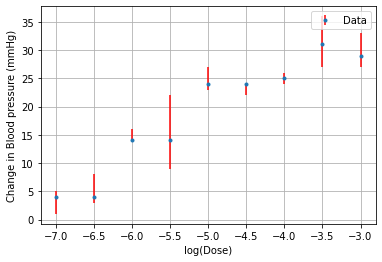

In [10]:
plt.errorbar(xdata, ydata, yerr=asymmetric_error, fmt='.', ecolor = 'red', label='Data')
plt.ylabel("Change in Blood pressure (mmHg)")
plt.xlabel("log(Dose)")
plt.legend()
plt.grid()
#plt.show()
plt.savefig("data_with_assymetric_error.pdf", dpi=400, bbox_inches='tight')

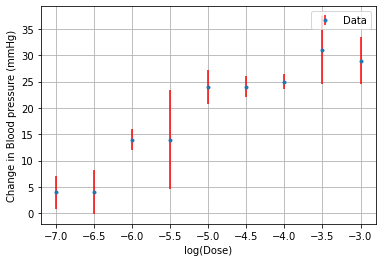

In [11]:
plt.errorbar(xdata, ydata, yerr=symmetric_error, fmt='.', ecolor = 'red', label='Data')
plt.legend()
plt.ylabel("Change in Blood pressure (mmHg)")
plt.xlabel("log(Dose)")
plt.legend()
plt.grid()
#plt.show()
plt.savefig("data_with_symetric_error.pdf", dpi=400, bbox_inches='tight')

In [12]:
parameter_linear,covariance_linear = curve_fit(linear, xdata, ydata, sigma=symmetric_error, absolute_sigma=True)

In [13]:
fitted_data = linear(xdata, *parameter_linear)

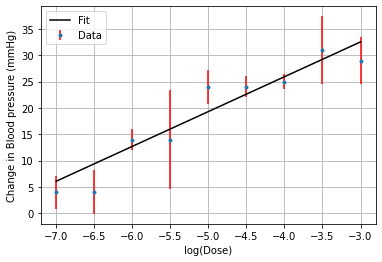

In [14]:
plt.errorbar(xdata, ydata, yerr=symmetric_error, fmt='.', ecolor = 'red', label='Data')
plt.plot(xdata, fitted_data, color='black', label='Fit')
plt.ylabel("Change in Blood pressure (mmHg)")
plt.xlabel("log(Dose)")
plt.legend()
plt.grid()
#plt.show()
plt.savefig("linear_function.pdf", dpi=400, bbox_inches='tight')


### When we have estimated uncertainities in the data, then we can estimate the goodness of fit by computing the reduced chi-squared statistic. For a linear fit to a set of N data points {x,y} that have estimated uncertainities , values of {symettric_error},
$$\chi^{2} = \sum_{i=1}^{N} \frac{ydata - y_lin} {symmetric_ error^{2}}$$
### where ydata is our observed value , y_lin is our fitted value  and symmetric_error is our uncertainity .

In [15]:
ymeans = ydata
y_lin = linear(xdata, *parameter_linear)  
dof = len(ymeans) - len(parameter_linear) 
chi_square_value = sum((ymeans - y_lin)**2/symmetric_error**2)
red_chi_square_value = (chi_square_value/dof) 
print("chi square value;",chi_square_value)
print("reduced chi square value;",red_chi_square_value) 

chi square value; 6.4188307807668945
reduced chi square value; 0.9169758258238421


In [16]:
parameter_quadratic,covariance_quadratic = curve_fit(quadratic, xdata, ydata, sigma=symmetric_error, absolute_sigma=True)

In [17]:
fitted_data = quadratic(xdata, *parameter_quadratic) 

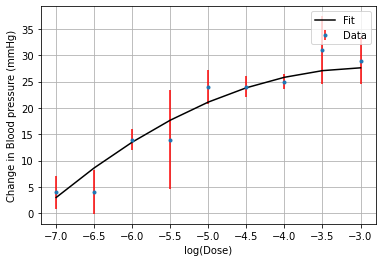

<Figure size 432x288 with 0 Axes>

In [18]:
plt.errorbar(xdata, ydata, yerr=symmetric_error, fmt='.', ecolor = 'red', label='Data')
plt.plot(xdata, fitted_data, color ='black', label='Fit')
plt.ylabel("Change in Blood pressure (mmHg)")
plt.xlabel("log(Dose)")
plt.legend()
plt.grid()
plt.show()
plt.savefig("quadratic_function.pdf", dpi=400, bbox_inches='tight')

In [19]:
ymeans = ydata
y_lin = quadratic(xdata, *parameter_quadratic)  
dof = len(ymeans) - len(parameter_quadratic) 
chi_square_value = sum((ymeans - y_lin)**2//symmetric_error**2)
red_chi_square_value = (chi_square_value/dof) 
print("chi square value;",chi_square_value)
print("reduced chi square value;",red_chi_square_value) 

chi square value; 1.0
reduced chi square value; 0.16666666666666666


In [20]:
parameter_cubic,covariance_cubic = curve_fit(cubic, xdata, ydata, sigma=symmetric_error, absolute_sigma=True)

In [21]:
fitted_data = cubic(xdata, *parameter_cubic) 

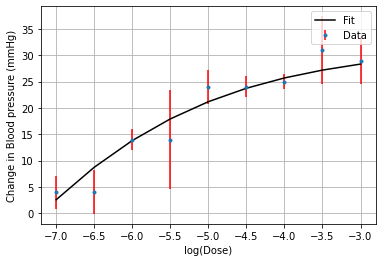

In [22]:
plt.errorbar(xdata, ydata, yerr=symmetric_error, fmt='.', ecolor = 'red', label='Data')
plt.plot(xdata, fitted_data, color='black', label='Fit')
plt.ylabel("Change in Blood pressure (mmHg)")
plt.xlabel("log(Dose)")
plt.legend()
plt.grid()
#plt.show()
plt.savefig("cubic_function.pdf", dpi=400, bbox_inches='tight')

In [23]:
ymeans = ydata
y_lin = cubic(xdata, *parameter_cubic)  
dof = len(ymeans) - len(parameter_cubic) 
chi_square_value = sum((ymeans - y_lin)**2//symmetric_error**2)
red_chi_square_value = (chi_square_value/dof) 
print("chi square value;",chi_square_value)
print("reduced chi square value;",red_chi_square_value) 

chi square value; 1.0
reduced chi square value; 0.2


|Model        | |Chi-square value| |Dof| |Reduced chi-square value|
|-------------| |----------------| |---| |------------------------|
|Hill_function| |11.4923         | |7  | |1.6417                  |
|linear       | |6.4188          | |7  | |0.9169                  |
|quadratic    | |1.0             | |6  | |0.1666                  |
|cubic        | |1.0             | |5  | |0.2000                  |